In [145]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'                           # отображает только предупреждение или ошибку

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import mnist                        # библиотека базы выборок Mnist
from tensorflow.keras.layers import Dense, Flatten

In [146]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()           # загружаем данные

In [147]:
# стандартизация входных данных: оттенки ч/б - всего 255 градаций, всего 10 возможных выходов
X_train = X_train / 255
X_test = X_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

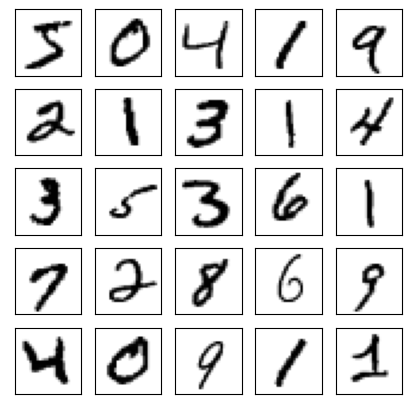

In [148]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

In [149]:
model = keras.Sequential([                                          # формируем структуру НС
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [150]:
print(model.summary())                                              # вывод структуры НС в консоль

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [151]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.3)
model.evaluate(X_test, y_test_cat)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3002 - accuracy: 0.9141 - val_loss: 0.1823 - val_accuracy: 0.9468
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1353 - accuracy: 0.9603 - val_loss: 0.1297 - val_accuracy: 0.9629
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0932 - accuracy: 0.9726 - val_loss: 0.1188 - val_accuracy: 0.9650
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0687 - accuracy: 0.9792 - val_loss: 0.1204 - val_accuracy: 0.9627
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.1078 - val_accuracy: 0.9685
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.1089 - val_accuracy: 0.9687
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.1108 - val_accuracy:

[0.09215462952852249, 0.9761000275611877]

1/1 [==============================] - 0s 47ms/step
[[6.8775308e-13 9.3112703e-08 9.9999988e-01 4.0693841e-08 5.5516769e-22
  1.9672597e-11 1.9270229e-13 1.0247105e-15 5.0147233e-09 4.1754767e-17]]
2


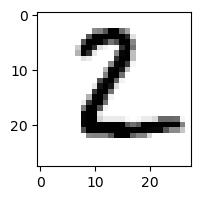

In [153]:
n = 1                                         # Предсказываем и выводим, например, 1-й элемент из тестовой выборки 
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))

plt.figure(figsize=(2,2))
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

In [154]:
pred = model.predict(X_test)                                   # Распознавание всей тестовой выборки
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [155]:
mask = pred == y_test                                          # Выделение неверных вариантов
print(mask[:100])

x_false = X_test[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
(239, 28, 28)


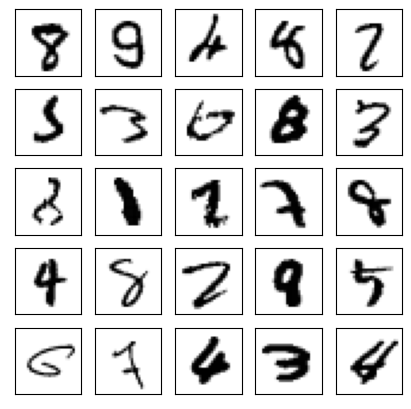

In [156]:
plt.figure(figsize=(5,5))                                     # Вывод первых 25 неверных результатов
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()